In [104]:
import pandas as pd
import kagglehub as kh

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression ,Lasso, Ridge
import numpy as np
from sklearn.metrics import mean_absolute_error,mean_squared_error

import seaborn as sns
import  matplotlib.pyplot as plt

In [105]:
path = kh.dataset_download("yasserh/housing-prices-dataset")

dataset = pd.read_csv(f"{path}/Housing.csv")
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [106]:
perk = dataset.pop("parking")
dataset.insert(5,"perking",perk)
dataset

,price,area,bedrooms,bathrooms,stories,perking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,13300000,7420,4,2,3,2,yes,no,no,no,yes,yes,furnished
1,12250000,8960,4,4,4,3,yes,no,no,no,yes,no,furnished
2,12250000,9960,3,2,2,2,yes,no,yes,no,no,yes,semi-furnished
3,12215000,7500,4,2,2,3,yes,no,yes,no,yes,yes,furnished
4,11410000,7420,4,1,2,2,yes,yes,yes,no,yes,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,yes,no,yes,no,no,no,unfurnished
541,1767150,2400,3,1,1,0,no,no,no,no,no,no,semi-furnished
542,1750000,3620,2,1,1,0,yes,no,no,no,no,no,unfurnished
543,1750000,2910,3,1,1,0,no,no,no,no,no,no,furnished


In [107]:
yes_no_cols = dataset.loc[:,'mainroad':'prefarea']
yes_no_cols


,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,yes,no,no,no,yes,yes
1,yes,no,no,no,yes,no
2,yes,no,yes,no,no,yes
3,yes,no,yes,no,yes,yes
4,yes,yes,yes,no,yes,no
...,...,...,...,...,...,...
540,yes,no,yes,no,no,no
541,no,no,no,no,no,no
542,yes,no,no,no,no,no
543,no,no,no,no,no,no


In [108]:
for col in yes_no_cols:
    dataset[col] = dataset[col].map({'yes': 1, 'no': 0})

In [109]:
incode = {"furnished":1,"semi-furnished":2,"unfurnished":0}
dataset["furnishingstatus"] = dataset["furnishingstatus"].map(incode)

dataset.head()

# dataset["furnishingstatus"].unique()

,price,area,bedrooms,bathrooms,stories,perking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,1
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,1
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,2
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,1
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,1


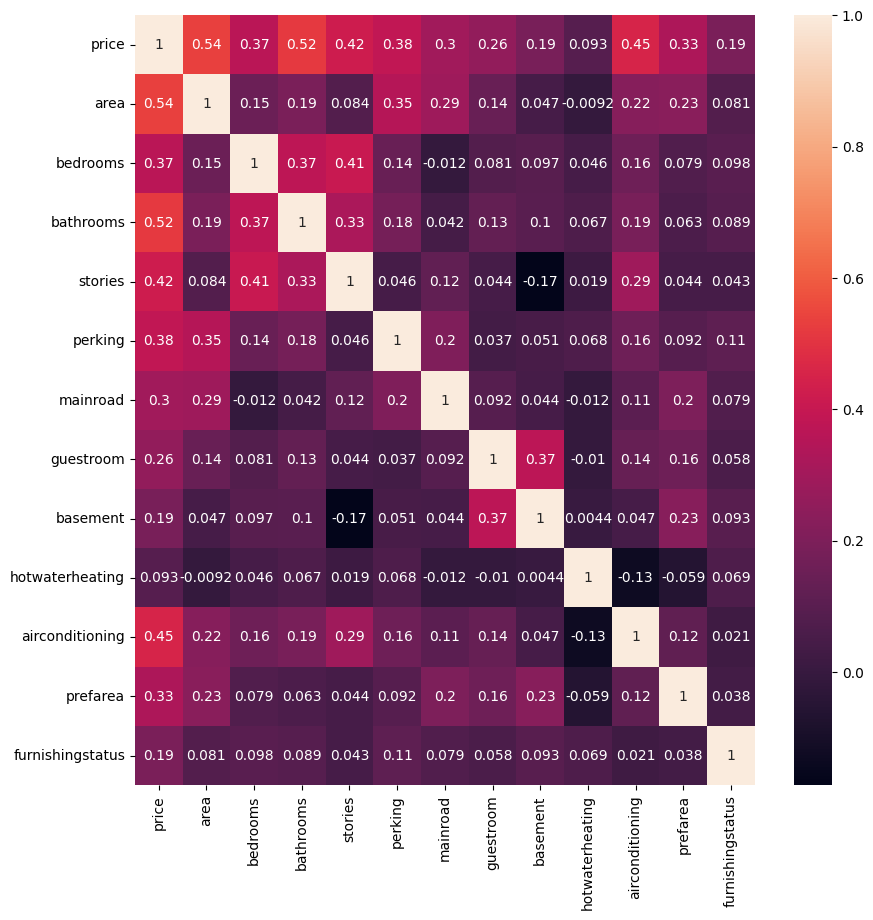

In [110]:
plt.figure(figsize=(10,10))
           
sns.heatmap( data=dataset.corr(numeric_only = True),annot=True)
plt.show()

In [111]:
x = dataset.drop("price",axis=1)
y = dataset["price"]


In [112]:
sc = StandardScaler()
x = sc.fit_transform(x)


In [128]:

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=27)
lr = LinearRegression()
lr.fit(x_train,y_train)
print(lr.score(x_train,y_train)*100,lr.score(x_test,y_test)*100)


68.00502918894709 66.51467784676532


In [114]:
print(mean_squared_error(y_test,lr.predict(x_test)))
print(mean_absolute_error(y_test,lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,lr.predict(x_test))))


1139999551836.3906
787888.6711219904
1067707.6153312717


In [130]:
ls = Lasso(alpha= 1)
ls.fit(x_train,y_train)
ls.score(x_test,y_test)

0.6651465239419656

In [132]:
print(mean_squared_error(y_test,ls.predict(x_test)))
print(mean_absolute_error(y_test,ls.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,ls.predict(x_test))))


1100470862421.4834
770245.9015012821
1049033.299005081


In [117]:
rg = Ridge(alpha= 1)
rg.fit(x_train,y_train)
rg.score(x_test,y_test)

0.6690899793863588

In [118]:
print(mean_squared_error(y_test,rg.predict(x_test)))
print(mean_absolute_error(y_test,rg.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,rg.predict(x_test))))


1139874265686.3333
787648.8230768206
1067648.9430924067


## Notes on Regularization

## What is Regularization?

Regularization is a technique used to improve the performance of machine learning models on new, unseen data by preventing overfitting (when a model learns the training data too well and fails to generalize).

---

### 🚦 **Types of Regularization**

#### **L1 Regularization (Lasso Regression)**
- **Penalty:** Sum of the absolute values of the model's weights.
- **Effect:** Can shrink some weights to exactly zero, effectively removing less important features.

#### **L2 Regularization (Ridge Regression)**
- **Penalty:** Sum of the squares of the model's weights.
- **Effect:** Shrinks weights towards zero, but rarely makes them exactly zero.

---

### 💡 **Why Use Regularization?**

- **Reduces Overfitting:** Helps the model generalize better to new data.
- **Feature Selection:** L1 can automatically select important features.
- **Simplifies Models:** Prevents models from becoming too complex.

---

### ⚙️ **Key Points**

- **Regularization Strength:** Controlled by the `alpha` parameter.
    - Higher `alpha` = Stronger penalty (more regularization).
- **When to Use:** Especially useful with many features or when features are correlated.

---

> **In summary:**  
> Regularization helps create simpler, more reliable models that perform well on both training and unseen data.